# 数值最优化的Python实现
在给定算法时,我们也会给定目标函数fun()和目标函数的梯度函数gfun()

## 无约束最优化方法的基本结构
**无约束最优化算法的基本结构:**

1. 给定初始点$x_{0}\in R^{n},k:=0$
2. 如果此时满足终止准则,输出结果否则下一步
3. 确定下降方向$d_{k}$
4. 确定步长$\alpha_{k}$使$f(x_{k}+\alpha_{k}d_{k})<f(x_{k})$
5. 令$x_{k+1}:=x_{k}+\alpha_{k}d_{k},k:=k+1$ 转第二步

总之就是一个函数确定一个方向让他可以变小,在确定一个不长不短的步长

In [ ]:
#求Hesse矩阵
def Hesse(fun):
    
    return hesse
#判断矩阵是否正定
def RC(hesse):

    return 0#0,1,2,3分别代表正定,半正定,半负定,负定

#求范数
def norm(x,n):
    return ((sum(x**n))**(1/n))


**最优性条件**

In [ ]:
#一阶必要条件
def o_must(gfun,x):
    if gfun(x)==0:
        return True
    else:
        return False
#二阶必要条件
def t_must(hesse):
    if RC(hesse)==1:
        return True
    else:
        return False
#二阶充分条件
def t_suff(gfun,x,hesse):
    if gfun(x)==0 and RC(hesse)==0:
        return True
    else:
        return False

**终止准则**

In [5]:
def end_cond(x1,x2,epsilon,gfun=None,fun=None,mode=2):
    if mode==1:
        if norm(gfun(x1),2)<=epsilon:
            return True
        else:
            return False
    elif mode==2:
        if norm(x2-x1,2)<=epsilon:
            return True
        else:
            return False
    elif mode==2:
        if fun(x1)-fun(x2)<=epsilon:
            return True
        else:
            return False

**收敛性与收敛速度**

In [ ]:
#判断线性收敛和超线性收敛
def linear_converge(opt_fun,x_,k):#给一个函数opt_fun传入一个点返回下一个迭代点,传入解x_和迭代次数k,这里k要趋近于正无穷,我们就给一个大一点的数
    for i in range(k):
        a = opt_fun(a)#获得第k次迭代的点
    b = norm(opt_fun(a)-x_,2)/norm(a-x_,2)#将第k+1次迭代的点减解的 二范数 除以 第k次迭代的点减解的 二范数
    if b == 0:
        return "sup_linear"#超线性收敛
    elif b>0 and b<1:
        return "linear_converge"#线性收敛
    else:
        return "no_linear_congverge"#非线性收敛

#判断二阶收敛
def double_converge(opt_fun,x_,k):#同上
    for i in range(k):
        a = opt_fun(a)#获得第k次迭代的点
    b = norm(opt_fun(a)-x_,2)/norm(a-x_,2)**2#将第k+1次迭代的点减解的 二范数 除以 第k次迭代的点减解的 二范数 的平方
    if b>0 and b<1:
        return "double_converge"#二阶收敛
    else:
        return "no_double_congverge"

**线搜索准则**

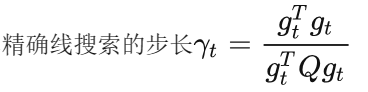

In [ ]:
def pl_search(gfun,x,hesse):
    return gfun(x).^2/gfun(x)^T*hesse(x)*gfun(x)

**进退法**

In [ ]:
def LF(fun,alpha,y,t):
    i=0

**0.618方法**

In [ ]:
import numpy
def fun(x):
    f = 1-x*(numpy.e**(-(x**2)))
    return f
def first(a_0,b_0,epsilion,tau):
    a_i = a_0
    b_i = b_0
    return second(a_i,b_i,epsilion,tau)
def second(a_i,b_i,epsilion,tau):
    if b_i-a_i < epsilion:
        a_ans = (b_i+a_i)/2
#         print(a_i,b_i,a_ans)
#         print(a_ans)
        return a_ans
    else:
        return third(a_i,b_i,epsilion,tau)
def third(a_i,b_i,epsilion,tau):
    alpha_l = a_i+(1-tau)*(b_i-a_i)
    alpha_r = a_i+tau*(b_i-a_i)
    return fourth(alpha_l,alpha_r,a_i,b_i,epsilion,tau)
def fourth(alpha_l,alpha_r,a_i,b_i,epsilion,tau):
    if fun(alpha_l) < fun(alpha_r):
        b_i = alpha_r
    else:
        a_i = alpha_l
#     print(a_i,b_i)
    return second(a_i,b_i,epsilion,tau)

**信赖域方法**

**拟牛顿法**

In [2]:
from scipy.optimize import fmin_powell, fmin_bfgs, fmin_cg, minimize, SR1
import numpy as np
import matplotlib.pyplot as plt

def r(i, x):
    if i % 2 == 1:
        return 10 * (x[i] - x[i - 1] ** 2)  # 因为ndarray数组的index是从0开始的， i多减一个
    else:
        return 1 - x[i - 2]

def f(m):
    def result(x):
        return sum([r(i, x) ** 2 for i in range(1, m + 1)])
    return result

In [3]:
# 获取retall的每个点的值损失|f(x) - f(x^*)|
def getLosses(retall, target_point, func):
    """
    :param retall: 存储迭代过程中每个迭代点的列表，列表的每个元素时一个ndarray对象
    :param target_point: 最优点，是ndarray对象
    :param func: 优化函数的映射f
    :return: 返回一个列表，代表retall中每个点到最优点的欧氏距离
    """
    losses = []
    for point in retall:
        losses.append(np.abs(func(target_point) - func(point)))
    return losses

In [4]:
sr1_losses = [] # 存储SR1的retall的列表
func = f(4) # 获取需要优化的函数

# 通过callback方法来添加迭代的停止条件
def getCallback(func, target_point, ftol, retall):
    """
    :param func: 优化目标的函数
    :param target_point:  目标收敛点
    :param ftol: 收敛条件：|f(x) - f(x^*)| < ftol时，迭代停止
    :param retall: 是否存储迭代信息
    :param extern_retall: 如果retall为True， 填入一个列表，迭代信息会存在这个列表中
    :return: call_back函数对象
    """
    def result(xk, state=None):
        if retall:
            global func, sr1_losses
        loss = np.abs(func(target_point) - func(xk))
        if loss < ftol:
            return True
        else:
            if retall:
                sr1_losses.append(loss)
            return False
    return result

In [5]:
# 绘制下降曲线
def plotDownCurve(dpi, losses, labels, xlabel=None, ylabel=None, title=None, grid=True):
    plt.figure(dpi=dpi)
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=18)
    plt.yscale("log")
    plt.grid(grid)
    plt.legend()

In [6]:
x_0 = np.array([1.2,1.0,1.0,1.0])   # 迭代初值
target_point = np.array([1,1,1,1], dtype="float32")     # 最优点
FTOL = 1e-8     # 终止阈值

sr1_callback = getCallback(func, target_point, ftol=FTOL, retall=True)
dfp_callback = getCallback(func, target_point, ftol=FTOL, retall=False)
bfgs_callback = getCallback(func, target_point, ftol=FTOL, retall=False)

In [7]:
minimum = minimize(fun=f(4), x0=x_0,        # 通过minimize函数执行SR1，根据内嵌的callback填充loss，并返回OptimizerResult对象
                   method="trust-constr",
                   hess=SR1(),
                   callback=sr1_callback)

dfp_minimum, dfp_retall = fmin_powell(func=func, x0=x_0,
                                      retall=True,
                                      disp=False,
                                      callback=dfp_callback)
dfp_losses = getLosses(dfp_retall, target_point, func=func)

bfgs_minimum, bfgs_retall = fmin_bfgs(f=func, x0=x_0,
                                      retall=True,
                                      disp=False,
                                      callback=bfgs_callback)
bfgs_losses = getLosses(bfgs_retall, target_point, func=func)

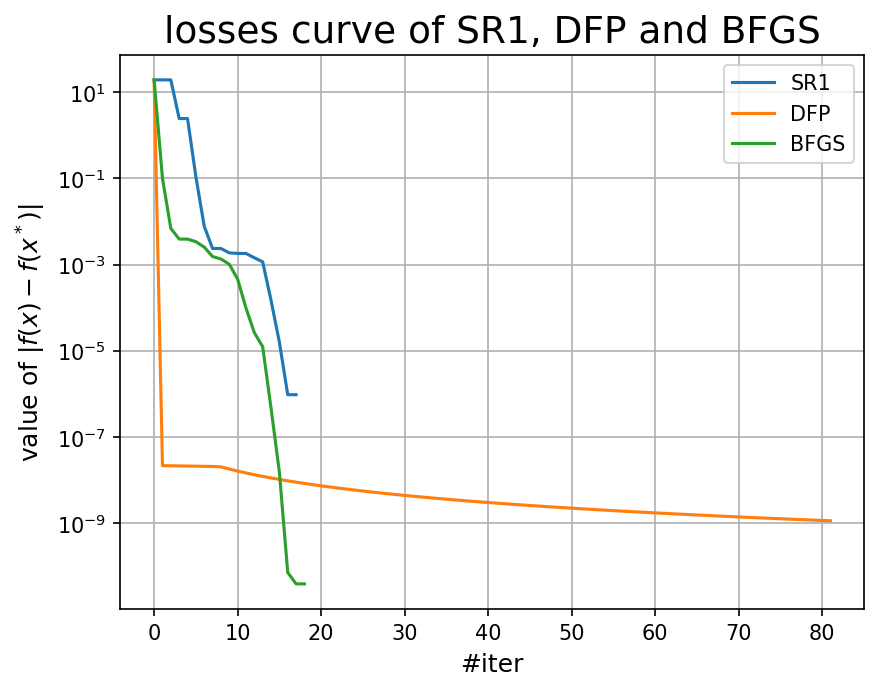

In [8]:
plotDownCurve(dpi=150,  
              losses=[sr1_losses, dfp_losses, bfgs_losses],
              labels=["SR1", "DFP", "BFGS"],
              xlabel="#iter",   
              ylabel="value of $|f(x) - f(x^*)|$",
              title="losses curve of SR1, DFP and BFGS")
plt.show()  